# Лабораторная работа. Случайные сигналы

В предыдущих частях мы узнали, что *сигнал* - это физический процесс, параметры которого изменяются в соответствии с передаваемым сообщением. Сигналы бывают – *случайные* и *детерминированные*. 

## Случайные сигналы

**Случайным** сигналом называют функцию времени, значения которой заранее
неизвестны и могут быть предсказаны лишь с некоторой *вероятностью*. К основным
характеристикам случайных сигналов относятся:

* закон распределения (относительное время пребывания значения сигнала в
  определенном интервале),
* спектральное распределение мощности.


Случайные сигналы делятся на два класса: 

1. Шумы - беспорядочные колебания, состоящие из набора разных частот и амплитуд.
2. Сигналы, несущие информацию, для обработки которых требуется прибегать к
   вероятностным методам. 

Случайные сигналы характеризуются **плотностью распределения вероятностей**.
Плотность вероятности это один из способов задания распределения случайных
величин.  Плотность вероятности - неотрицательная функция при любых значениях
дискретного сигнала. Для аналоговых случайных сигналов интеграл от функции
сигнала во всем диапазоне значений стремится к единице. Для дискретных случайных
величин **не** существует функции плотности распределения вероятностей, т.к.
дискретная случайная величина не является непрерывной функцией. Однако,
математический аппарат позволяет вычислять приближенные значения функции.

Простые примеры дискретных случайных величин:
* количество выпавших орлов и количество выпавших решек при броске монеты
  счетное число N раз,
* число попаданий в мишень при ограниченном числе выстрелов
* погрешности измерений приборов

Плотность вероятности случайного сигнала позволяет определить математические
моменты разного порядка:

- **Математическое ожидание**: среднее значение последовательности случайных
  величин

$m = \frac{1}{N}\sum_{n=0}^{N-1}x(n)$

Под математическим ожиданием в теории сигналов зачастую понимают смещение
сигнала по уровню относительно нуля (постоянная составляющая). 

Напоминаю, что в python для вычисления математического ожидания используется
метод `mean()` в библиотеке `numpy`.

- **Дисперсия**: среднее значение квадратов разностей между значениями
  последовательности и её средним значением

$\sigma^2 = \frac{1}{N-1}\sum_{n=0}^{N-1}|x(n) - m|^{2}$ 

В литературе часто используется термин **среднеквадратическое отклонение**. Эта
величина равна квадратному корню из дисперсии сигнала.

В python в библиотеке `numpy` для вычисления дисперсии используется метод - `var()`, а для поиска
среднеквадратического отклонения используется метод - `std()`.

- **Ковариация**:

Одним из способов количественного определения силы связи между двумя переменными является их ковариация. Она измеряет тенденцию двух переменных изменяться вместе.

Если у нас имеется два ряда чисел $X$ и $Y$, то их отклонения от среднего значения составляют:

$dx_i= x_i-\bar{x}$

$dy_i=y_i-\bar{y}$

Здесь $x_i$ — это значение $X$ с индексом $i$, $y_i$ — значение $Y$ с индексом $i$, $\bar{x}$ — среднее значение X, и $\bar{y}$ — среднее значение $Y$. Если $X$ и $Y$ проявляют тенденцию изменяться вместе, то их отклонения от среднего будет иметь одинаковый знак: отрицательный, если они — меньше среднего, положительный, если они больше среднего. Если мы их перемножим, то произведение будет положительным, когда у них одинаковый знак, и отрицательным, когда у них разные знаки. Сложение произведений дает меру тенденции этих двух переменных отклоняться от среднего значения в одинаковом направлении для каждой заданной выборки.

Ковариация определяется как среднее этих произведений:

$cov(X,Y) = \frac{1}{n}\sum^n_{i=1}dx_idy_i$

В Python модуль `statistics` содержит функцию `covariance()`. 

Случайный дискретный сигнал при $N = 100000$ отсчётов и его плотность вероятности:

Mean of the signal: -0.032692104037689004
Std. of the signal: 10.020365002664889


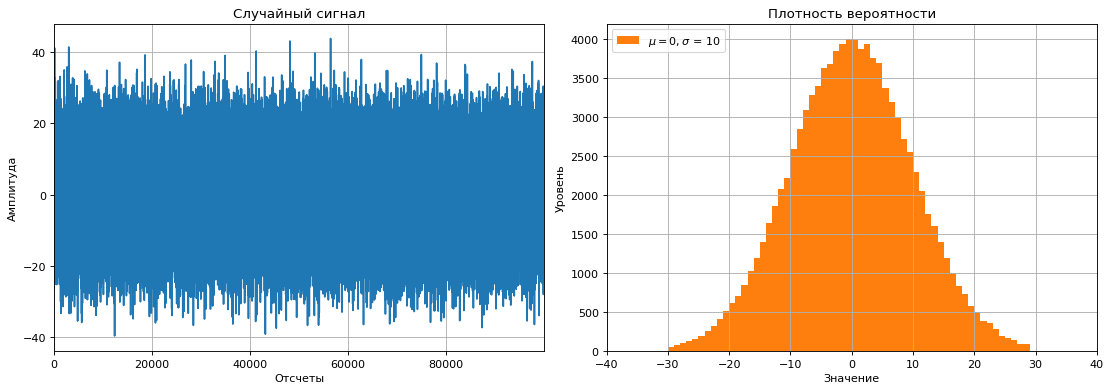

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, rfft

%matplotlib inline

N = 100000

# Random signal
m, s = 0, 10
np.random.seed(2)
sig = np.random.normal(m, s, N)

# Create hist for PDF
hist, _ = np.histogram(sig, bins=list(range(0, 256)))

# Plot figure
fig = plt.figure(1, figsize=(14, 5), dpi=80)
plt.subplot(1, 2, 1)
plt.title('Случайный сигнал')
plt.xlabel('Отсчеты')
plt.ylabel('Амплитуда')
plt.plot(sig, color='C0')
plt.xlim([0, N-1])
plt.grid()

plt.subplot(1, 2, 2)
plt.title('Плотность вероятности')
plt.xlabel('Значение')
plt.ylabel('Уровень')
plt.xlim([-4*s, 4*s])
plt.hist(sig, bins=list(range(-s*3, s*3)), color='C1', label=r'$\mu = %d, \sigma$ = %d' % (m, s))
plt.grid()
plt.legend(loc='upper left')
plt.tight_layout()

print('Mean of the signal:', np.mean(sig))
print('Std. of the signal:', np.std(sig))

### Нормальное распределение

Согласно **центральной предельной теореме**, сумма большого числа слабо
зависимых случайных величин имеет распределение близкое к **нормальному**. При
этом, случайные величины распределены в рамках определенного масштаба, то есть
ни одно из значений не вносит существенного вклада в конечную сумму.

Нормальное распределение (распределение Гаусса) - распределение вероятностей,
которое задаётся функцией:

$f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{- \frac{(x-\mu)^2}{2\sigma^2}}$

где $\mu$ - математическое ожидание (среднее значение случайного процесса), а
$\sigma$ - среднеквадратическое отклонение.

Нормальное распределение считается **стандартным**, если $\mu = 0, \sigma = 1$.

#### Правило "трех сигм" $3\sigma$

Правило трех сигм гласит, что с вероятностью $P = 0.997$ значения нормально
распределенной последовательности лежат в интервале утроенного значения
среднеквадратического отклонения. Иными словами, практически все значения
случайного процесса лежат в интервале трех сигм, то есть в диапазоне
$(x-3\sigma, x+3\sigma)$. 

Ниже представлены графики плотности вероятности и функции распределения
нормального закона распределения при различных параметрах математического
ожидания и дисперсии. 

Для построения графиков используется метод `norm(mu, sigma)` из пакета
`numpy.stats` , а не функция `randn()` из пакета `numpy.random`. Это связано с
тем, что у `norm()` возвращает объект, у которого есть методы PDF - плотность
вероятности и CDF - функции распределения случайной величины.

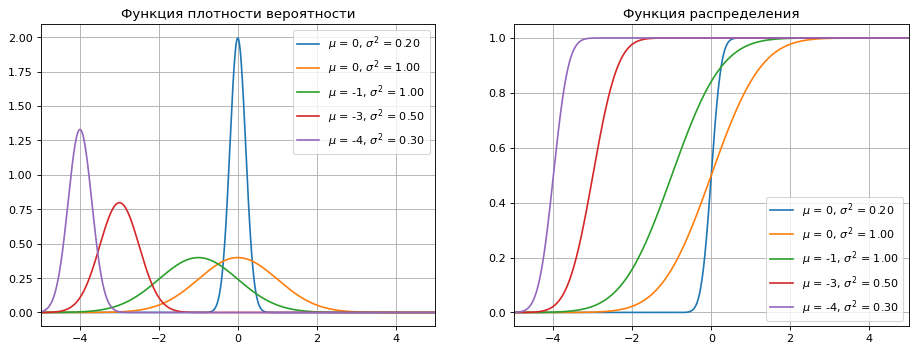

In [2]:
from scipy.stats import norm

# Gaussian parameters
mu = [0, 0, -1, -3, -4]
sg = [0.2, 1, 1, 0.5, 0.3]

# Create Normal distributions
pxn = [norm(mu[i], sg[i]) for i in range(5)]

tt = np.linspace(-5, 5, N)
# Plot PDF and CDF
fig = plt.figure(1, figsize=(14, 5), dpi=80)

plt.subplot(1,2,1)
plt.title('Функция плотности вероятности')
for i in range(5):
    plt.plot(tt, pxn[i].pdf(tt), color='C'+str(i), markersize=2, label='$\mu$ = %d, $\sigma^2$ = %0.2f' % (mu[i], sg[i]))
plt.legend(loc='upper right')
plt.xlim([-5, 5])
plt.grid(True)

plt.subplot(1,2,2)
plt.title('Функция распределения')
for i in range(5):
    plt.plot(tt, pxn[i].cdf(tt), color='C'+str(i), markersize=2, label='$\mu$ = %d, $\sigma^2$ = %0.2f' % (mu[i], sg[i]))
plt.legend(loc='lower right')
plt.xlim([-5, 5])
plt.grid(True)

### Длина случайного процесса

На основании центральной предельной теоремы, чем больше длительность случайного
процесса, тем сильнее он похож на нормальное (Гауссовское) распределение. Можно
показать, что при увеличении длины сигнала, функция плотности вероятности
стремится к функции нормального распределения.

Зададим длину случайной последовательности $N = 100, 1000, 10000, 100000$
отсчётов. На приведенных ниже графиках показано, как длина случайного процесса
влияет на форму графика плотности вероятности.

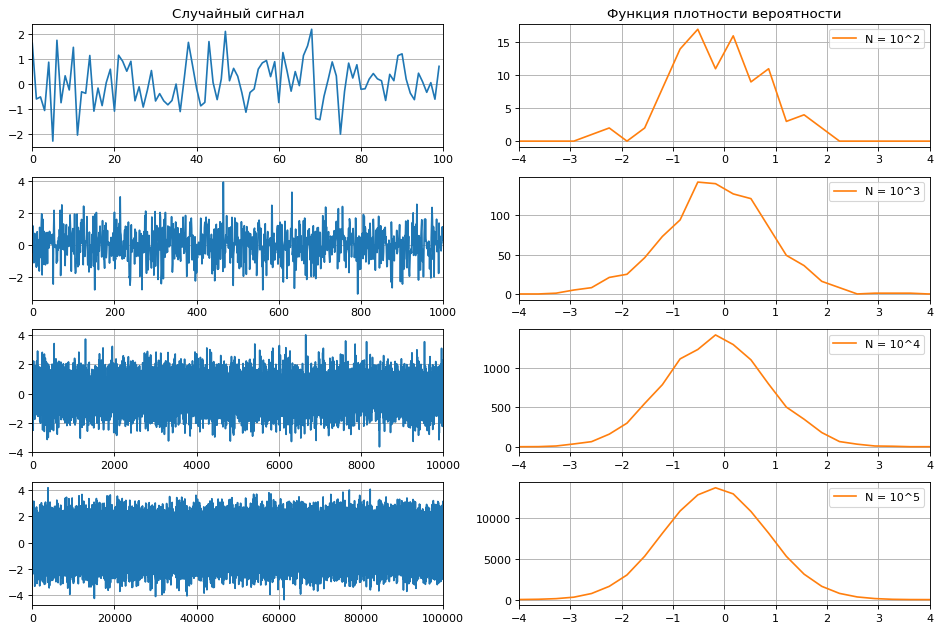

In [3]:
N = 10 ** np.arange(2,6)

# Set random seed
np.random.seed(1)

plt.figure(figsize=(12, 8), dpi=80)
for i in range(len(N)):

    # create random signal
    dat = np.random.normal(size=N[i])
    # hist and bins
    hist, bins = np.histogram(dat, np.linspace(-5, 5, 30))
    # probability density function
    pdf = norm.pdf(bins)

    plt.subplot(len(N), 2, 2*i+1)
    if i == 0:
        plt.title('Случайный сигнал')
    plt.plot(dat)
    plt.xlim([0, dat.size])
    plt.grid(True)

    plt.subplot(len(N), 2, 2*i+2)
    if i == 0:
        plt.title('Функция плотности вероятности')
    plt.plot(bins[:-1], hist, color='C1', label='N = 10^{}'.format(int(np.log10(N[i]))))
    plt.xlim([-4, 4])
    plt.legend(loc='upper right')
    plt.grid(True)
plt.tight_layout()

### Python библиотека Random

Python библиотека `numpy` содержит пакет `random`, который содержит набор функций математической статистики. Для импорта пакета в проект необходимо выполнить команду:

```python
from numpy.random import *
# or
import numpy as np
```

Кроме того, в библиотеке `scipy` содержится пакет `stats`, который дополняет (и частично переопределяет) функционал пакета random. Приведем список основных функций из пакета random, подробнее см. [numpy.random](https://numpy.org/doc/stable/reference/random/index.html)

| **Function**      | **Description** |
| --- | --- | 
| `rand(d0, d1, ..., dn)`               | Равномерное распределение (возвращает N-мерный массив) |
| `randn(d0, d1, ..., dn)`              | Стандартное нормальное распределение (возвращает N-мерный массив) |
| `randint(low[, high, size, dtype])`   | Массив целочисленных значений в заданном диапазоне |
| `random([size])`                      | Равномерное распределение в интервале $[0.0, 1.0)$ |
| `shuffle(x)`                          | Перестановка элементов последовательности "на лету" |
| `permutation(x)`                      | Перестановка элементов массива или возврат их индексов |
| `normal([loc, scale, size])`          | Массив случайных чисел, распределенных по нормальному закону |
| `pareto(a[, size])`                   | Массив случайных чисел, распределенных по закону Парето |
| `poisson([lam, size])`                | Массив случайных чисел, распределенных по закону Пуассона  |
| `rayleigh([scale, size])`             | Массив случайных чисел, распределенных по Рэлеевскому закону |
| `seed([seed])`                        | Инициализация псевдослучайной величины |

____

В задачах цифровой обработки сигналов случайные процессы играют важную роль. С
помощью случайных величин можно моделировать воздействие реальной среды на
прохождение сигнала от источника к приёмнику данных. Зачастую, при прохождении
сигнала через какое-то шумящее звено, к сигналу добавляется так называемый
**белый шум**. Как правило, спектральная плотность такого шума равномерно
(одинаково) распределена на всех частотах, а значения шума во временной области
распределены нормально (Гауссовский закон распределения). Поскольку белый шум
физически добавляется к амплитудам сигнала в выбранные отсчеты времени, он
называется **аддитивный**. Таким образом, основной источник шумов носит название
*аддитивный белый гауссовский шум* (AWGN - Additive white Gaussian noise). 

Стоит отметить, что термин *белый* связан с тем, что спектральные составляющие
равномерно распределены по всему диапазону частот. Изучение особенностей шумов
выходит за рамки этого материала, но в последующих лекциях планируется вернуться
к вопросам влияния шумов на протекающие процессы в устройствах, в частности в
цифровых. Поскольку частотные значения распределены равномерно,
автокорреляционная функция (АКФ) белого шума в идеале стремится к
**дельта-функции**. 

## Задания

### 0. ФИО и группа

Иброхимов Аброрбек Абдулвохид угли, Рим-141002

### 1. Сгенерируйте и постройте разные типы случайных сигналов (начальные параметры вы выбираете самостоятельно в группе)

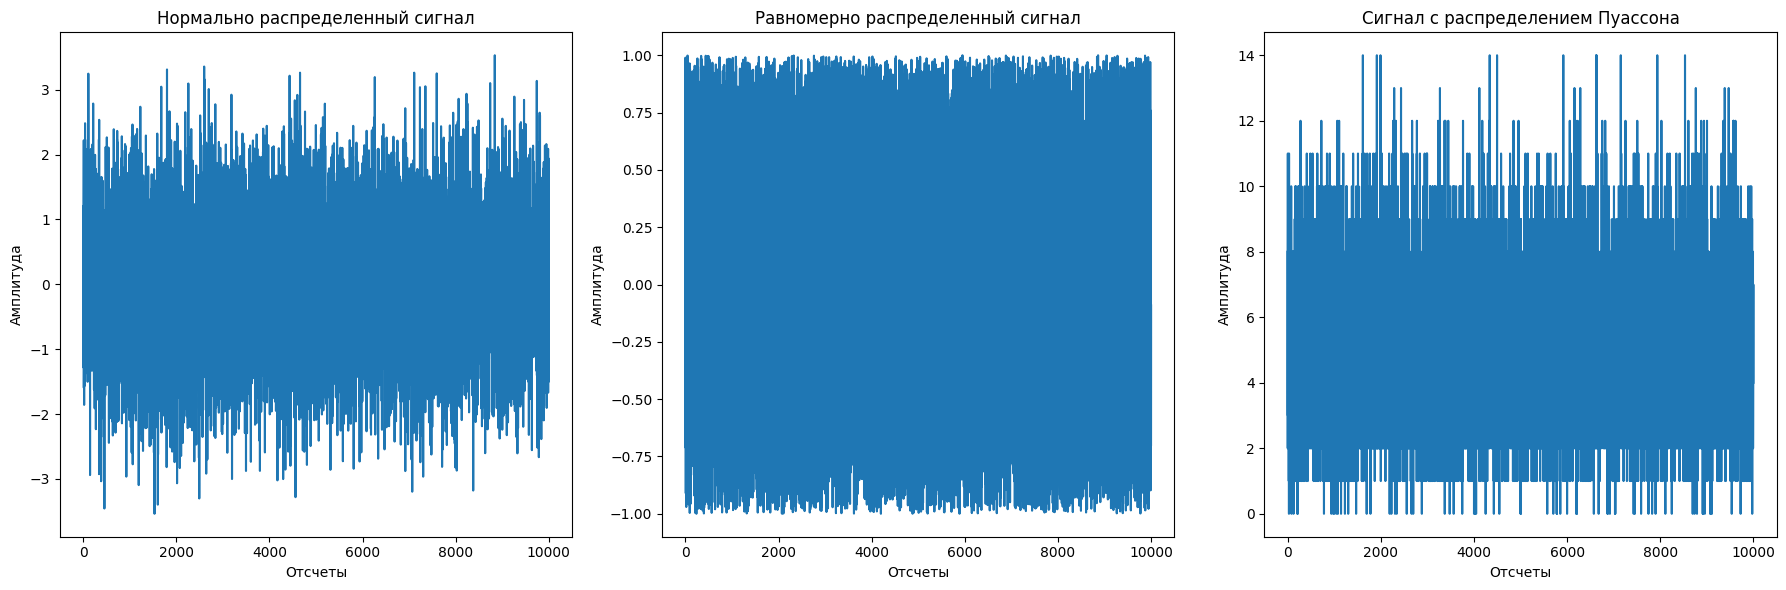

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры сигналов
N = 10000  # Количество отсчетов

# 1. Нормально распределенный сигнал
mu_norm = 0
sigma_norm = 1
signal_norm = np.random.normal(mu_norm, sigma_norm, N)

# 2. Равномерно распределенный сигнал
low_uniform = -1
high_uniform = 1
signal_uniform = np.random.uniform(low_uniform, high_uniform, N)

# 3. Сигнал с распределением Пуассона
lam_poisson = 5
signal_poisson = np.random.poisson(lam_poisson, N)

# Построение графиков
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(signal_norm)
plt.title('Нормально распределенный сигнал')
plt.xlabel('Отсчеты')
plt.ylabel('Амплитуда')

plt.subplot(1, 3, 2)
plt.plot(signal_uniform)
plt.title('Равномерно распределенный сигнал')
plt.xlabel('Отсчеты')
plt.ylabel('Амплитуда')

plt.subplot(1, 3, 3)
plt.plot(signal_poisson)
plt.title('Сигнал с распределением Пуассона')
plt.xlabel('Отсчеты')
plt.ylabel('Амплитуда')

plt.tight_layout()
plt.show()

### 2. Постройте графики плотности вероятностей сигналов и сделайте выводы

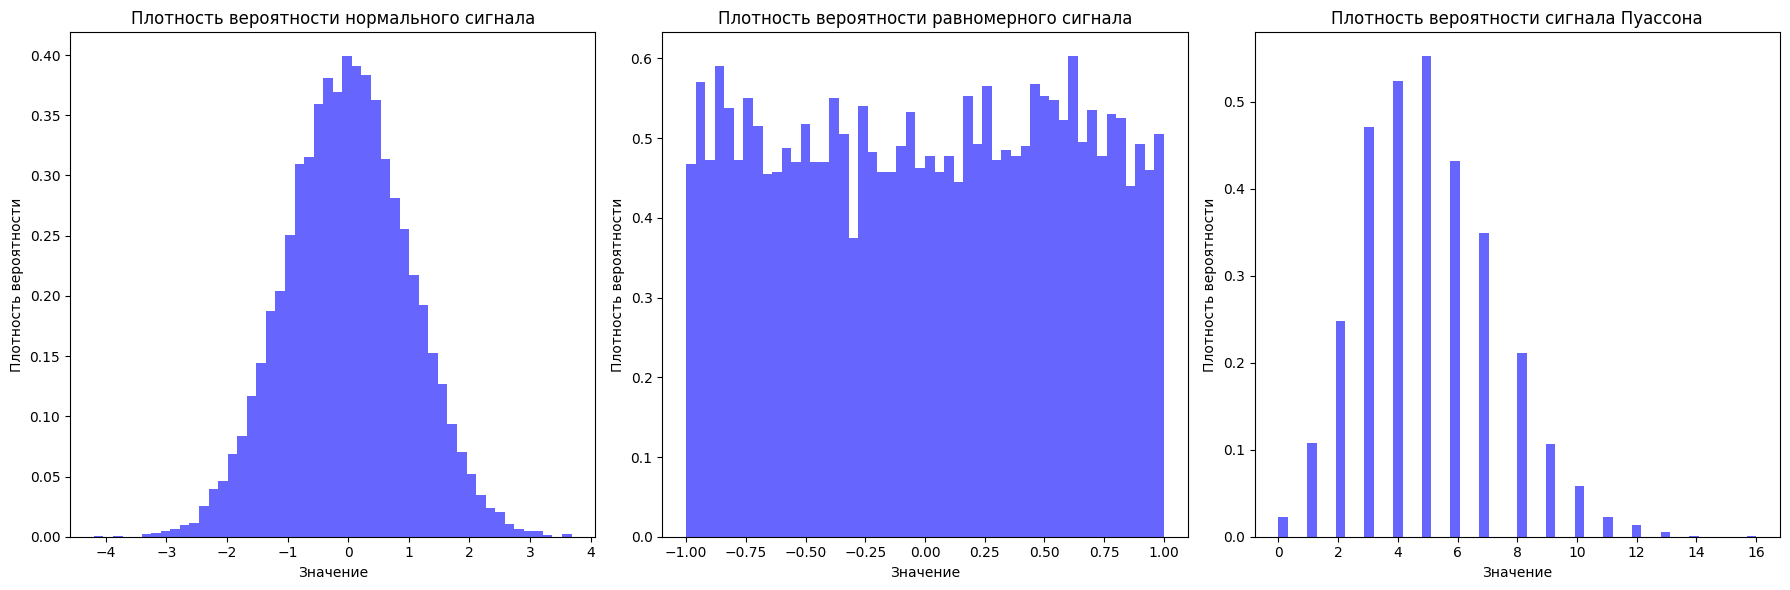

In [12]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.hist(signal_norm, bins=50, density=True, alpha=0.6, color='b')
plt.title('Плотность вероятности нормального сигнала')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')

plt.subplot(1, 3, 2)
plt.hist(signal_uniform, bins=50, density=True, alpha=0.6, color='b')
plt.title('Плотность вероятности равномерного сигнала')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')

plt.subplot(1, 3, 3)
plt.hist(signal_poisson, bins=50, density=True, alpha=0.6, color='b')
plt.title('Плотность вероятности сигнала Пуассона')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')

plt.tight_layout()
plt.show()

Выводы:
Нормально распределенный сигнал имеет колоколообразную форму плотности вероятности, что соответствует теоретическому 
распределению Гаусса.

Равномерно распределенный сигнал имеет равномерную плотность вероятности в заданном диапазоне.

Сигнал с распределением Пуассона имеет асимметричную форму плотности вероятности с пиком около среднего значения.

### 3. Рассчитайте статистические параметры сигналов из задания 1 и сделайте выводы

In [6]:
# Статистические параметры
mean_norm = np.mean(signal_norm)
var_norm = np.var(signal_norm)
std_norm = np.std(signal_norm)

mean_uniform = np.mean(signal_uniform)
var_uniform = np.var(signal_uniform)
std_uniform = np.std(signal_uniform)

mean_poisson = np.mean(signal_poisson)
var_poisson = np.var(signal_poisson)
std_poisson = np.std(signal_poisson)

print(f"Нормально распределенный сигнал: Mean = {mean_norm:.4f}, Variance = {var_norm:.4f}, Std = {std_norm:.4f}")
print(f"Равномерно распределенный сигнал: Mean = {mean_uniform:.4f}, Variance = {var_uniform:.4f}, Std = {std_uniform:.4f}")
print(f"Сигнал с распределением Пуассона: Mean = {mean_poisson:.4f}, Variance = {var_poisson:.4f}, Std = {std_poisson:.4f}")

Нормально распределенный сигнал: Mean = -0.0151, Variance = 1.0017, Std = 1.0009
Равномерно распределенный сигнал: Mean = -0.0001, Variance = 0.3323, Std = 0.5765
Сигнал с распределением Пуассона: Mean = 4.9937, Variance = 5.0697, Std = 2.2516


Выводы:
Для нормально распределенного сигнала математическое ожидание близко к нулю, а дисперсия и среднеквадратическое отклонение близки к 1, что соответствует заданным параметрам.

Для равномерно распределенного сигнала математическое ожидание близко к середине диапазона (-1, 1), а дисперсия и среднеквадратическое отклонение зависят от ширины диапазона.

Для сигнала с распределением Пуассона математическое ожидание и дисперсия близки к параметру λ, что также соответствует теоретическим ожиданиям.

### 4. Рассчитайте и постройте АКФ для сигналов из задания 1, сделайте выводы

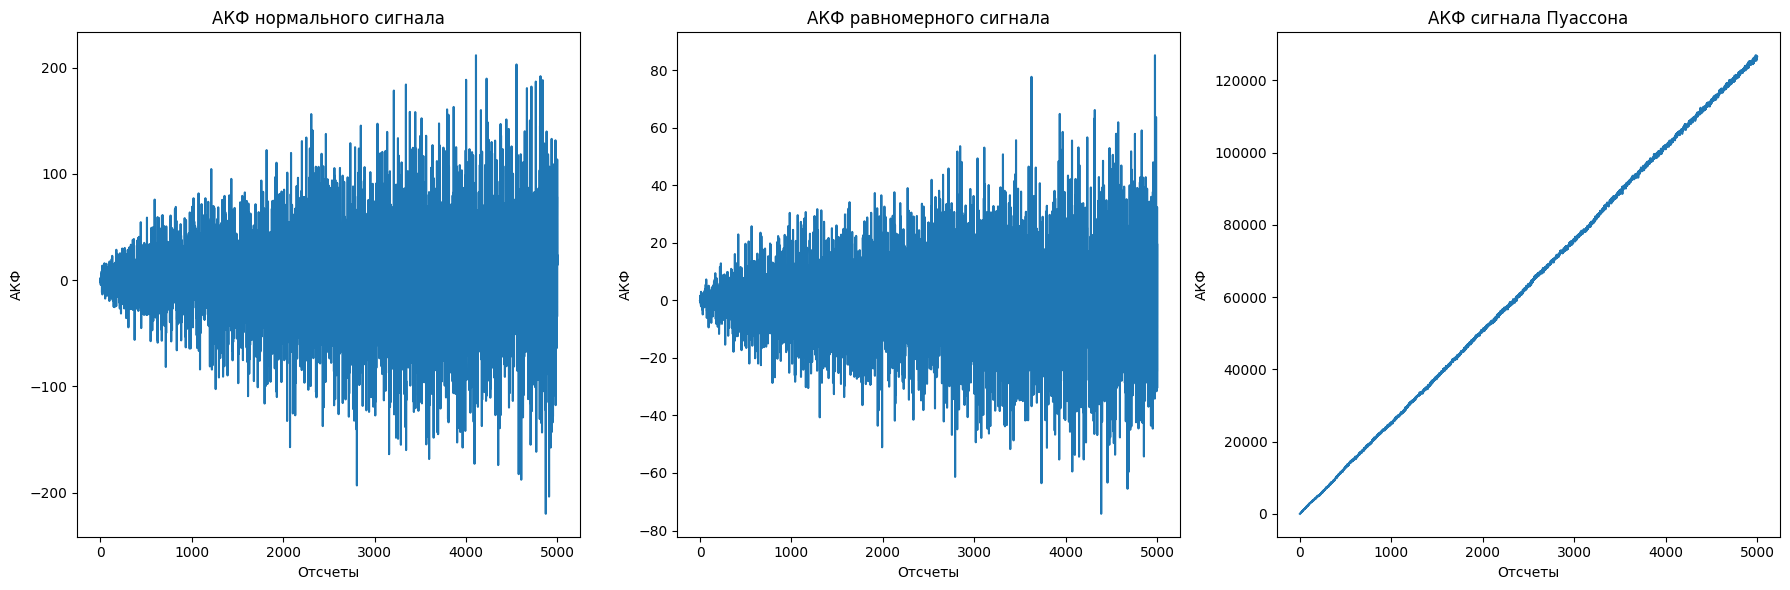

In [14]:
# Функция для расчета автокорреляционной функции (АКФ)
def autocorrelation(signal):
    return np.correlate(signal, signal, mode='full')

# Расчет АКФ
acf_norm = autocorrelation(signal_norm)
acf_uniform = autocorrelation(signal_uniform)
acf_poisson = autocorrelation(signal_poisson)

# Построение графиков АКФ
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(acf_norm[:N//2])
plt.title('АКФ нормального сигнала')
plt.xlabel('Отсчеты')
plt.ylabel('АКФ')

plt.subplot(1, 3, 2)
plt.plot(acf_uniform[:N//2])
plt.title('АКФ равномерного сигнала')
plt.xlabel('Отсчеты')
plt.ylabel('АКФ')

plt.subplot(1, 3, 3)
plt.plot(acf_poisson[:N//2])
plt.title('АКФ сигнала Пуассона')
plt.xlabel('Отсчеты')
plt.ylabel('АКФ')

plt.tight_layout()
plt.show()

Выводы:
АКФ нормального сигнала быстро спадает к нулю, что характерно для случайного процесса с нулевым математическим ожиданием.

АКФ равномерного сигнала также быстро спадает к нулю, но может иметь небольшие колебания из-за равномерного распределения.

АКФ сигнала с распределением Пуассона имеет более сложную форму, что связано с дискретным характером распределения.

### 5. Рассчитайте и постройте спектры для сигналов из задания 1, сделайте выводы

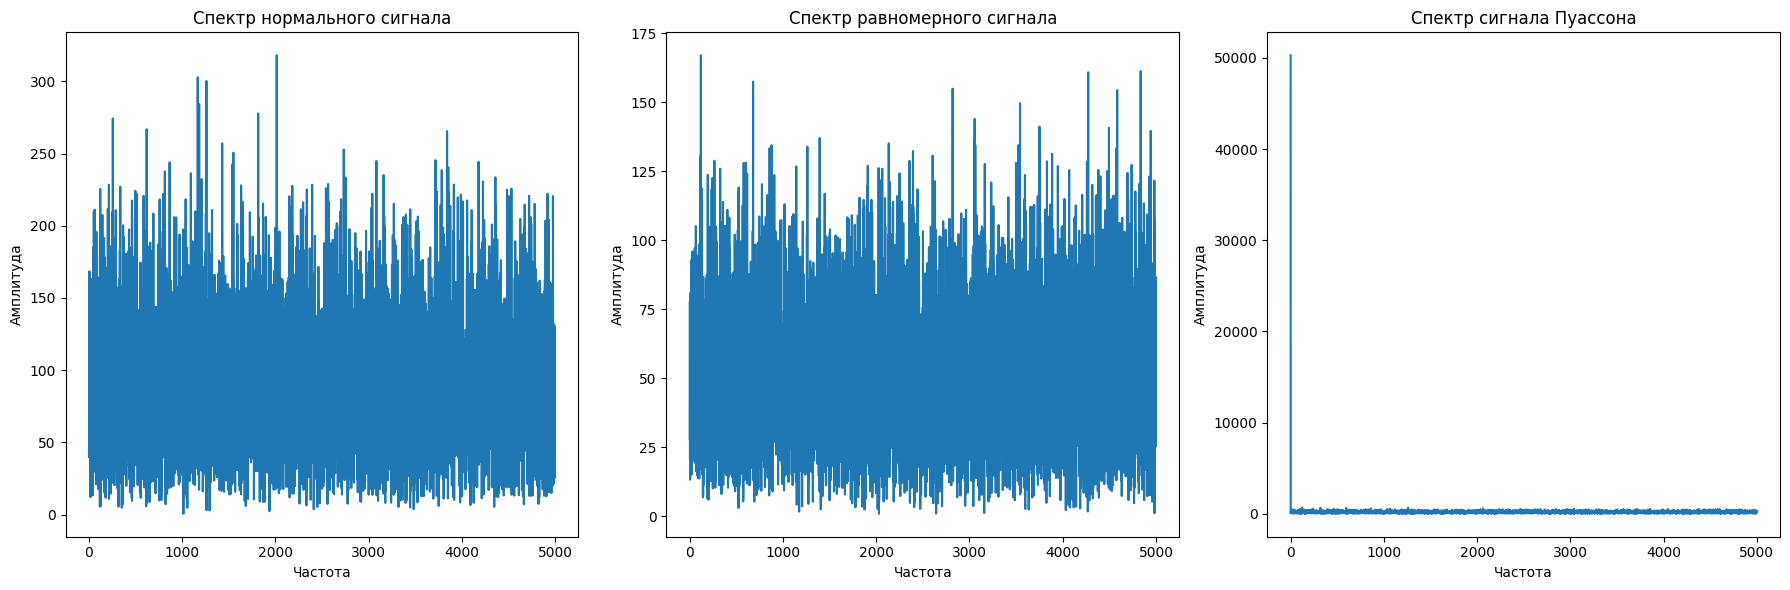

In [15]:
def fft_spectrum(signal):
    return np.abs(np.fft.fft(signal))

# Расчет спектров
spectrum_norm = fft_spectrum(signal_norm)
spectrum_uniform = fft_spectrum(signal_uniform)
spectrum_poisson = fft_spectrum(signal_poisson)

# Построение графиков спектров
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(spectrum_norm[:N//2])
plt.title('Спектр нормального сигнала')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')

plt.subplot(1, 3, 2)
plt.plot(spectrum_uniform[:N//2])
plt.title('Спектр равномерного сигнала')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')

plt.subplot(1, 3, 3)
plt.plot(spectrum_poisson[:N//2])
plt.title('Спектр сигнала Пуассона')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')

plt.tight_layout()
plt.show()

Выводы:
Спектр нормального сигнала имеет равномерное распределение по частотам, что характерно для белого шума.

Спектр равномерного сигнала также имеет равномерное распределение, но может иметь небольшие отклонения.

Спектр сигнала с распределением Пуассона имеет более сложную форму, что связано с дискретным характером распределения.

### 6. Выполните исследования влияния шума на гармонический сигнал

1. Сгенерируйте составной гармонический сигнал, состоящий из суммы нескольких гармонических сигналов (на усмотрение команды)
   * Постройте графики и рассчитайте задания 3-5. 
2. Сгенерируйте случайный сигнал (шум) с помощью любого из методов, использованного в задании 1
   * Постройте графики и рассчитайте задания 3-5. 
3. Наложите шум (п.2) на сигнал (п.1)
   * Постройте графики и рассчитайте задания 3-5. 
4. Сделайте выводы

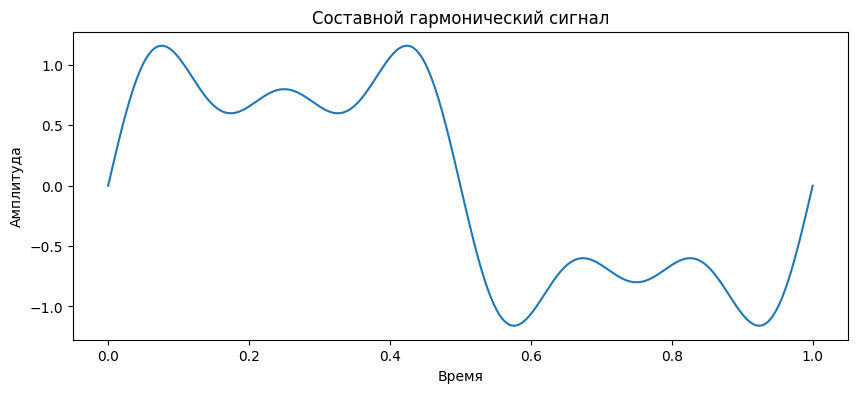

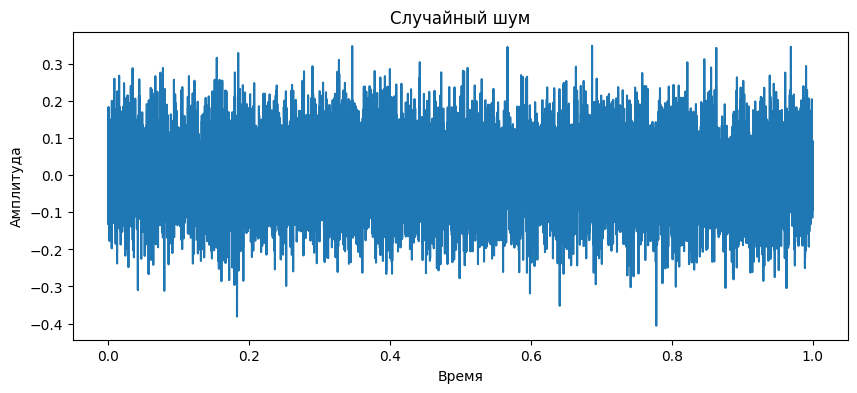

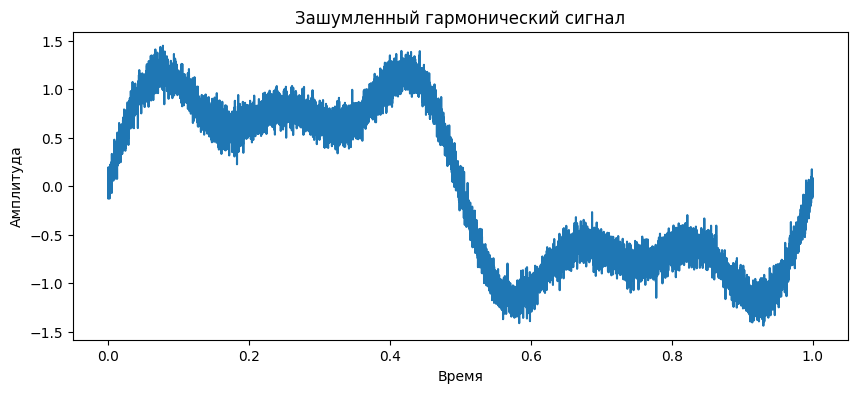

Зашумленный сигнал: Mean = 0.0018, Variance = 0.6834, Std = 0.8267


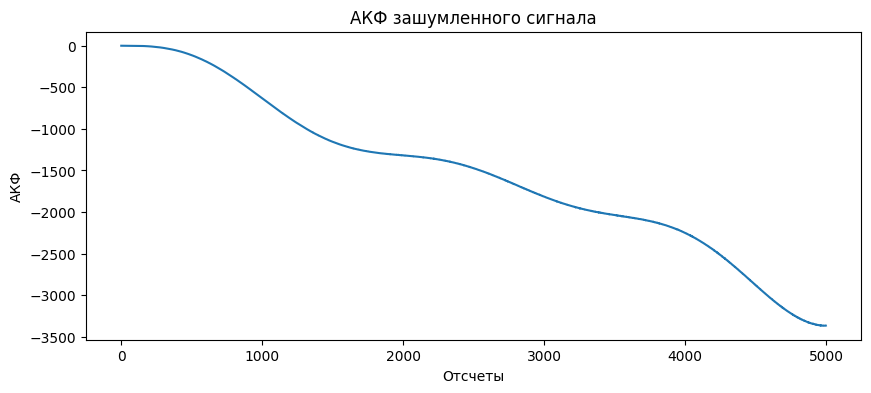

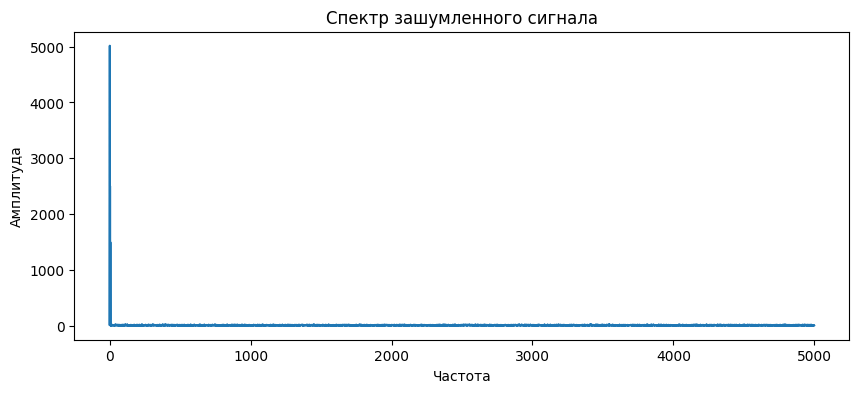

In [16]:
# Параметры гармонического сигнала
frequencies = [1, 3, 5]  # Частоты гармоник
amplitudes = [1, 0.5, 0.3]  # Амплитуды гармоник

# Генерация гармонического сигнала
t = np.linspace(0, 1, N)
harmonic_signal = np.zeros_like(t)
for f, a in zip(frequencies, amplitudes):
    harmonic_signal += a * np.sin(2 * np.pi * f * t)

# Построение графика гармонического сигнала
plt.figure(figsize=(10, 4))
plt.plot(t, harmonic_signal)
plt.title('Составной гармонический сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.show()

# Генерация шума
noise = np.random.normal(0, 0.1, N)

# Построение графика шума
plt.figure(figsize=(10, 4))
plt.plot(t, noise)
plt.title('Случайный шум')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.show()


# Наложение шума на гармонический сигнал
noisy_signal = harmonic_signal + noise

# Построение графика зашумленного сигнала
plt.figure(figsize=(10, 4))
plt.plot(t, noisy_signal)
plt.title('Зашумленный гармонический сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.show()

# Статистические параметры
mean_noisy = np.mean(noisy_signal)
var_noisy = np.var(noisy_signal)
std_noisy = np.std(noisy_signal)

print(f"Зашумленный сигнал: Mean = {mean_noisy:.4f}, Variance = {var_noisy:.4f}, Std = {std_noisy:.4f}")

# Расчет АКФ
acf_noisy = autocorrelation(noisy_signal)

# Построение графика АКФ
plt.figure(figsize=(10, 4))
plt.plot(acf_noisy[:N//2])
plt.title('АКФ зашумленного сигнала')
plt.xlabel('Отсчеты')
plt.ylabel('АКФ')
plt.show()

# Расчет спектра
spectrum_noisy = fft_spectrum(noisy_signal)

# Построение графика спектра
plt.figure(figsize=(10, 4))
plt.plot(spectrum_noisy[:N//2])
plt.title('Спектр зашумленного сигнала')
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.show()

Выводы:
Наложение шума на гармонический сигнал увеличивает дисперсию и среднеквадратическое отклонение сигнала.

АКФ зашумленного сигнала имеет более сложную форму, что связано с наложением шума.

Спектр зашумленного сигнала содержит дополнительные частотные компоненты, связанные с шумом.